# Chargement des données : 
# Projet de classification d'images d'avions commerciaux et militaires 
### Auteurs : Groupe 5

*Faical Toubali Hadaoui*

*Mehdi Sensali*

*Ignacio Lucas Oros Campo*

*Thibaud Merieux*

*Cédric Martin*


<br>Dans notre projet **"Airplanes Image Classification"**, nous avons choisi de classifier les images d'avions militaires/commerciaux  selon deux version :


<br>**Première version** : Images d'avions associées à 2 labels différents : Deux classes **Militaire** et **Commercial**.

<br>**Deuxième version** : Images d'avions associées à N labels différents correspondant aux différents modèles d'avions militiaires/commerciaux que notre base de données contient. 

![<Photo>](https://zupimages.net/up/21/11/spon.png)

La base de données a un nombre totale d'images de l'ordre de 4000. à savoir, en moyenne 400 images dans chaque modèle d'avion commercial/militaire qui sont les suivant : 

Militaire :
- Dassault Rafale
- Lockheed Martin F-35 Lightning  II
- Eurofighter Typhoon
- Soukoi Su-57
- A400M Atlas d'Airbus

Commerciale :
- Airbus A380
- Airbus Belluga
- Boeing 747
- Boeing 777
- Dassault Falcon 8X

<br>Les deux versions sons réalisés sur ce notebook:.


--------------------------------------------------------------------------------

<br>**Première version**: 
Nous avons réparti les images dans 3 ensembles (et donc 3 dossiers): 

***Train*** : se compose de 70%  de la base de données totale, par conséquent, 70% d'images de chaque modèle d'avions. 

***Validation*** : se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.

***Test*** se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.


<br>Chacun de ces dossiers comporte un sous-dossier par classe (Commerciale/ Militaire), qui contient lui meme les images des différents modèles d'avions. L'arborescence est résumée sur l'image ci-dessus.

--------------------------------------------------------------------------------


<br>**Deuxième version**: 
Nous avons réparti les images dans 3 ensembles (et donc 3 dossiers): 

***Train*** : se compose de 70%  de la base de données totale, par conséquent, 70% d'images de chaque modèle d'avions. 

***Validation*** : se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.

***Test*** se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.



<br>Chacun de ces dossiers comporte deux sous-dossiers (Commerciale/Militaire) qui se composent eux memes des différents modèles d'avions. Ainsi, dans cette version nous aurons autant de labels qu'autant des N classes correspondants aux différents modèles d'avions. Les labels seront de la forme suivante : (Type/Modèle). Par exemple :

<br>Commercial/Airbus_A380 ou Military/Rafale. 

<br>Ainsi, le nombre de labels va correspondre à la somme de chaque type(Commercial/Militaire) multiplié par le nombre de modèles d'avions qu'il contint. Puisque nous avons 5 modèles d'avions par type (Commercial/Militaire) nous aurons  alors 10 labels.

--------------------------------------------------------------------------------


<br>Nous avons choisi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide.

[Lien de GitHub vers notre repository](https://github.com/faicaltoubali/Airplanes_Image_Classification)

In [1]:
!git clone https://github.com/faicaltoubali/Airplanes_Image_Classification.git
path = "./Airplanes_Image_Classification/"

Cloning into 'Airplanes_Image_Classification'...
remote: Enumerating objects: 498, done.
remote: Counting objects: 100% (498/498), done.
remote: Compressing objects: 100% (369/369), done.
remote: Total 4024 (delta 198), reused 403 (delta 120), pack-reused 3526
Receiving objects: 100% (4024/4024), 653.69 MiB | 34.48 MiB/s, done.
Resolving deltas: 100% (225/225), done.
Checking out files: 100% (7088/7088), done.


Maintenant que les données sont téléchargées localement depuis Google Colab, nous allons charger les images et les labels. 

In [36]:
from tensorflow.python.client import device_lib
import keras
from keras import layers, models, optimizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
import pandas as pd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


#Version 1 : Classification binaire :    Commercial/Militaire

In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):


    num_images = 0

    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        for j in range(len(dirs)):
          dirs_modeles = sorted(os.listdir(data_path + dataset + '/' + classes[i] + '/' + dirs[j]))
          num_images += len(dirs_modeles)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    x_def = np.zeros((num_images, 1))

    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        for j in range(len(dirs)):
          dirs_modeles = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j]))
 
          # Chargement des images, 
          for idx_img in range(len(dirs_modeles)):
            item = dirs_modeles[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j] + '/' +item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j] + '/' + item)
                img = img.convert('RGB')

                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))

                x[current_index] = np.asarray(img) 
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

In [ ]:
labels = ['Commercial', 'Military']

x_train, y_train = load_data(path, labels, dataset='Dataset/Train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='Dataset/Validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='Dataset/Test', image_size=64)
print(x_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(2519, 64, 64, 3) (2519, 1)
(523, 64, 64, 3) (523, 1)
(526, 64, 64, 3) (526, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

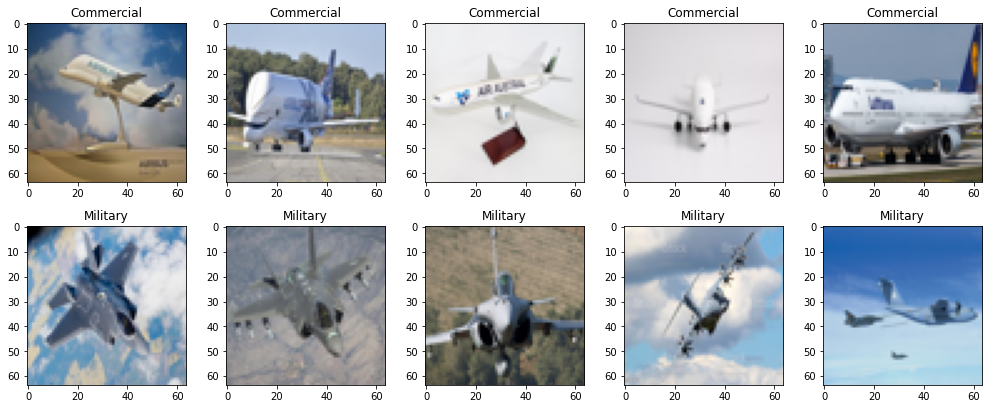

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 14))

#shuffle_indices = np.random.permutation(1000)
random_commercialplanes_indices = random.sample(range(1, 1000), 5)
random_militaryplanes_indices = random.sample(range(1001, 2519 ), 5)
shuffle_indices = random_commercialplanes_indices + random_militaryplanes_indices

for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

Création de listes contenant les noms des images des ensemble d'apprentissage, de validation et de test, ainsi que les label (0: militaire, 1:commerciale) associés.


In [37]:
import os
import shutil

#Images d'entrainement
train_filenames_militaire = os.listdir(path + "Dataset/Train/Military")
train_filenames_commerciale = os.listdir(path + "Dataset/Train/Commercial")
if not os.path.exists(path + "Dataset/Train/Train"):
  os.mkdir(path + "Dataset/Train/Train")

path_train = path + "Dataset/Train/"


for i in range(len(train_filenames_militaire)):
  subfolder = os.listdir(path + "Dataset/Train/Military/" + train_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_train+"Military/"+ train_filenames_militaire[i] + '/' + filename, path_train+"Train/"+filename)

for i in range(len(train_filenames_commerciale)):
  subfolder = os.listdir(path + "Dataset/Train/Commercial/" + train_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_train+"Commercial/"+ train_filenames_commerciale[i] + '/' + filename, path_train+"Train/"+filename)


train_filenames = os.listdir(path + "Dataset/Train/Train")
train_categories=[]
for filename in train_filenames:
    category = filename.split('-')[0]
    if category == 'Military':
        train_categories.append(0)
    else:
        train_categories.append(1)


#Images de validation
validation_filenames_militaire = os.listdir(path + "Dataset/Validation/Military")
validation_filenames_commerciale = os.listdir(path + "Dataset/Validation/Commercial")
if not os.path.exists(path + "Dataset/Validation/Validation"):
  os.mkdir(path + "Dataset/Validation/Validation")

path_validation = path + "Dataset/Validation/"

for i in range(len(validation_filenames_militaire)) :
  subfolder = os.listdir(path + "Dataset/Validation/Military/" + validation_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_validation+"Military/"+ validation_filenames_militaire[i] + '/' + filename, path_validation +"Validation/"+filename)

for i in range(len(validation_filenames_commerciale)) :
  subfolder = os.listdir(path + "Dataset/Validation/Commercial/" + validation_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_validation+"Commercial/"+ validation_filenames_commerciale[i] + '/' + filename, path_validation+"Validation/"+filename)


validation_filenames = os.listdir(path + "Dataset/Validation/Validation")
validation_categories=[]
for filename in validation_filenames:
    category = filename.split('-')[0]
    if category == 'Military':
        validation_categories.append(0)
    else:
        validation_categories.append(1)


#Images de test
test_filenames_militaire = os.listdir(path + "Dataset/Test/Military")
test_filenames_commerciale = os.listdir(path + "Dataset/Test/Commercial")
if not os.path.exists(path + "Dataset/Test/Test"):
  os.mkdir(path + "Dataset/Test/Test")

path_test = path + "Dataset/Test/"

for i in range(len(test_filenames_militaire)):
  subfolder =  os.listdir(path + "Dataset/Test/Military/" + test_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_test +"Military/"+ test_filenames_militaire[i] + '/' + filename, path_test +"Test/"+filename)


for i in range(len(test_filenames_commerciale)):
  subfolder =  os.listdir(path + "Dataset/Test/Commercial/" + test_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_test +"Commercial/"+ test_filenames_commerciale[i] + '/' + filename, path_test+"Test/"+filename)


test_filenames = os.listdir(path + "Dataset/Test/Test")
test_categories=[]
for filename in test_filenames:
    category = filename.split('-')[0]
    if category == 'Military':
        test_categories.append(0)
    else:
        test_categories.append(1)

DataFrames


In [41]:
#Images d'entrainement
train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})


#Images de validation
validation_df = pd.DataFrame({
    'filename': validation_filenames,
    'category': validation_categories
})


#Images de test
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})


train_df['category'] = train_df['category'].astype(str)
validation_df['category'] = validation_df['category'].astype(str)
test_df['category'] = test_df['category'].astype(str)

total_train = train_df.shape[0]
total_validate = validation_df.shape[0]

Visualisation des images : 

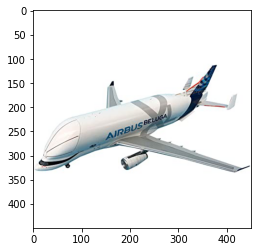

In [43]:
import random
from keras.preprocessing.image import load_img

sample = random.choice(test_filenames)
image = load_img(path + "Dataset/Test/Test/" +sample)
plt.imshow(image)
plt.show()

In [42]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
image_size = 150


#Images d'entrainement
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path + "Dataset/Train/Train/",
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    class_mode='binary',
    batch_size=batch_size
)

#Images de validation
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    path + "Dataset/Validation/Validation/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

#Images de test
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    path + "Dataset/Test/Test/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2519 validated image filenames belonging to 2 classes.
Found 523 validated image filenames belonging to 2 classes.
Found 526 validated image filenames belonging to 2 classes.


In [44]:
labels= {0: 'Military', 1: 'Commercial'}
labels.get(0), labels.get(1)

('Military', 'Commercial')

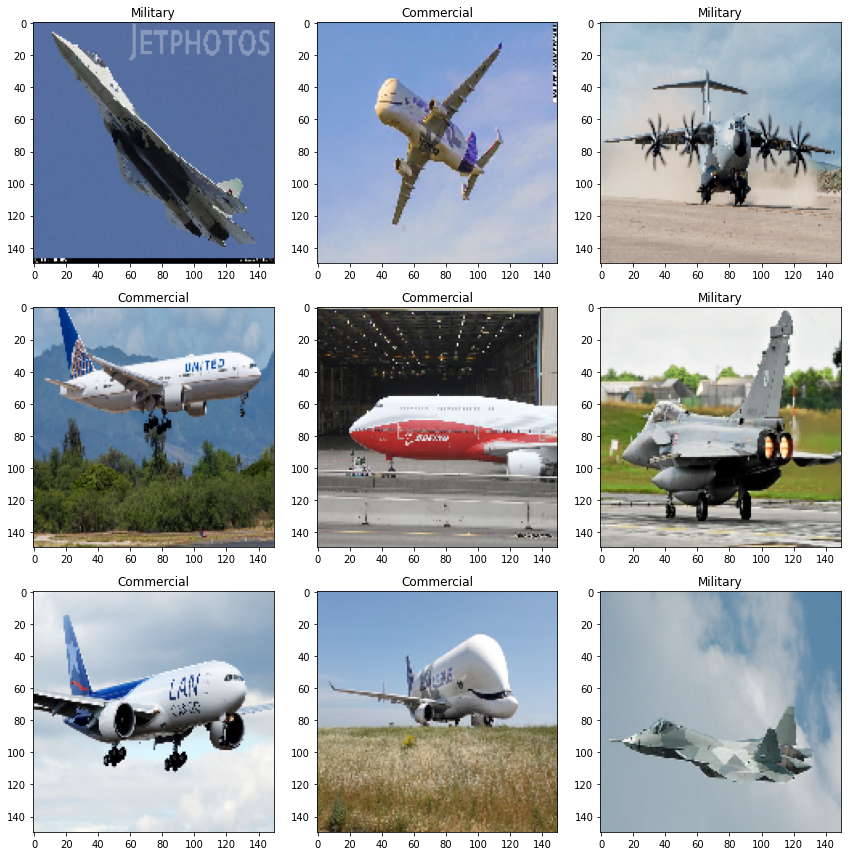

In [45]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.title(labels.get(Y_batch[0]))
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [46]:
model = models.Sequential()
# A COMPLETER

model.add(Conv2D(32, (3, 3), padding="same" ,activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
                 
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))    

model.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
                 
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ...

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation = "relu", input_dim=128))  # Couche dense, à 512 neurones
model.add(Dense(1, activation="sigmoid"))   # Couche de sortie


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [49]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
130/158 [=======================>......] - ETA: 8s - loss: 0.6703 - acc: 0.5782

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 86s 351ms/step - loss: 0.6652 - acc: 0.5868 - val_loss: 0.5586 - val_acc: 0.7017
Epoch 2/10
158/158 [==============================] - 55s 350ms/step - loss: 0.5541 - acc: 0.7217 - val_loss: 0.5424 - val_acc: 0.7113
Epoch 3/10
158/158 [==============================] - 56s 353ms/step - loss: 0.4804 - acc: 0.7695 - val_loss: 0.4813 - val_acc: 0.7744
Epoch 4/10
158/158 [==============================] - 55s 349ms/step - loss: 0.4272 - acc: 0.8189 - val_loss: 0.4622 - val_acc: 0.7782
Epoch 5/10
158/158 [==============================] - 56s 353ms/step - loss: 0.3804 - acc: 0.8397 - val_loss: 0.4123 - val_acc: 0.8126
Epoch 6/10
158/158 [==============================] - 55s 352ms/step - loss: 0.3521 - acc: 0.8352 - val_loss: 0.3786 - val_acc: 0.8298
Epoch 7/10
158/158 [==============================] - 55s 351ms/step - loss: 0.2706 - acc: 0.8958 - val_loss: 0.3744 - val_acc: 0.8394
Epoch 8/10
158/158 [==============================] - 55s 348ms/st

In [50]:
def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

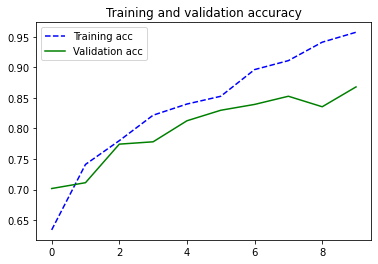

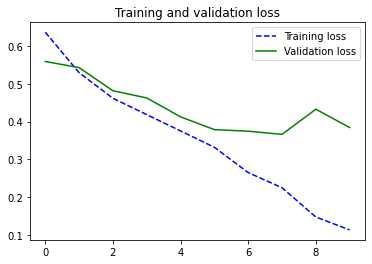

In [51]:
plot_training_analysis()


#Version 2 : Classification multi-classes : 10 labels différents correspondant aux différents modèles d'avions militiaires/commerciaux que contient notre base de données :


In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data2(data_path, classes, dataset='train', image_size=64):


    num_images = 0

    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    x_def = np.zeros((num_images, 1))

    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))

        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

In [ ]:
labels2 = ['Commercial/Airbus_A380', 'Commercial/Airbus_Belluga', 'Commercial/Boeing_747', 'Commercial/Boeing_777', 'Commercial/Falcon_8x',
          'Military/A400M', 'Military/Eurofighter_Typhoon', 'Military/Rafale', 'Military/F-35', 'Military/Su-57']

x2_train, y2_train = load_data2(path, labels2, dataset='Dataset/Train', image_size=64)
print(x2_train.shape, y2_train.shape)

x2_val, y2_val = load_data2(path, labels2, dataset='Dataset/Validation', image_size=64)
print(x2_val.shape, y2_val.shape)

x2_test, y2_test = load_data2(path, labels2, dataset='Dataset/Test', image_size=64)
print(x2_test.shape, y2_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(2519, 64, 64, 3) (2519, 1)
(523, 64, 64, 3) (523, 1)
(526, 64, 64, 3) (526, 1)


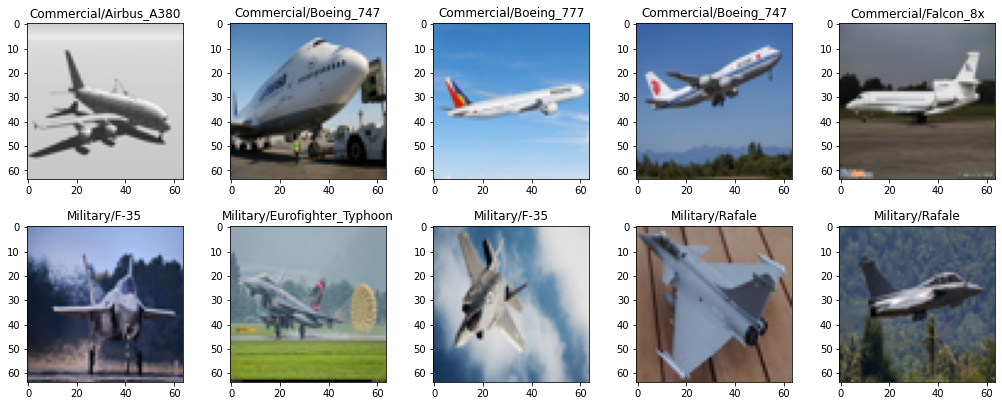

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 14))

random_commercialplanes_indices2 = random.sample(range(1, 1000), 5)
random_militaryplanes_indices2 = random.sample(range(1001, 2519), 5)
shuffle_indices2 = random_commercialplanes_indices2 + random_militaryplanes_indices2

for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    image2 = x2_train[shuffle_indices2[i]]
    plt.title(labels2[int(y2_train[shuffle_indices2[i]])])
    plt.imshow(image2/255)

plt.tight_layout()
plt.show()